In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import warnings
# warnings.filterwarnings('ignore')

In [109]:
!pip install chardet

In [110]:
import chardet

with open("/content/Diwali Sales Data.csv", 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']

df = pd.read_csv("/content/Diwali Sales Data.csv", encoding=encoding)
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


**Data Cleaning**
---

In [111]:
df.shape

(11251, 15)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [113]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [114]:
df.drop(["Status","unnamed1"], axis=1, inplace=True)
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [115]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [116]:
df[df["Amount"].isnull()]

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN
14,1003858,Cano,P00293742,M,46-50,46,1,Madhya Pradesh,Central,Hospitality,Auto,3,NaN
16,1005447,Amy,P00275642,F,46-50,48,1,Andhra Pradesh,Southern,IT Sector,Auto,3,NaN
109,1005265,Sakshi,P00296242,F,46-50,48,1,Delhi,Central,Banking,Footwear & Shoes,1,NaN
111,1005261,Apoorva,P00057942,F,36-45,41,1,Delhi,Central,IT Sector,Footwear & Shoes,2,NaN
184,1005538,Kartik,P00269542,F,46-50,49,1,Karnataka,Southern,Banking,Footwear & Shoes,1,NaN
293,1000326,Jonathan,P00120542,M,51-55,53,0,Gujarat,Western,IT Sector,Footwear & Shoes,3,NaN
344,1002507,Lakshmi,P00045842,F,26-35,35,1,Gujarat,Western,Chemical,Furniture,1,NaN
345,1004498,Srishti,P00030842,F,51-55,55,0,Delhi,Central,Textile,Footwear & Shoes,1,NaN
452,1004601,Gaurav,P00014442,F,36-45,40,1,Madhya Pradesh,Central,Hospitality,Food,4,NaN


In [117]:
df.dropna(inplace=True)
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [118]:
df.shape

(11239, 13)

In [119]:
df["Amount"]= df["Amount"].astype("int")
df["Amount"].dtypes

dtype('int64')

In [120]:
df["Amount"].head(2)

0    23952
1    23934
Name: Amount, dtype: int64

In [121]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

**Exploratory Data Analysis**
---

**Gender**
---

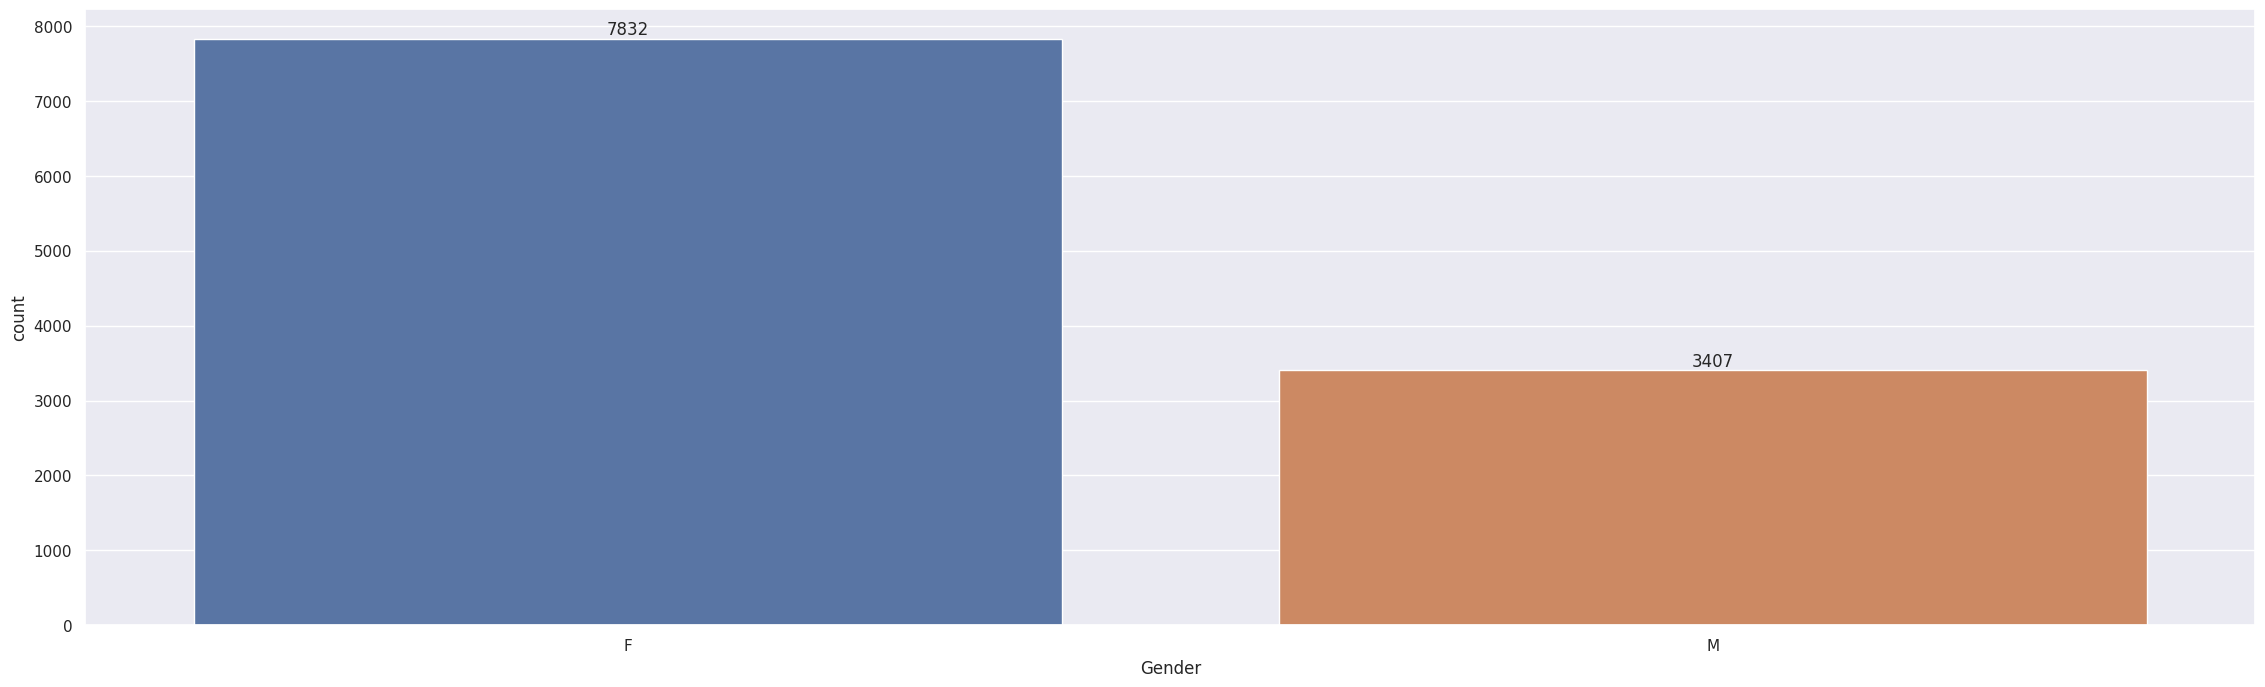

In [122]:
ax = sns.countplot(x="Gender", data=df, hue="Gender")
for bars in ax.containers:
  ax.bar_label(bars)

There are more number of female buyers than male buyers.

In [123]:
df.groupby(["Gender"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

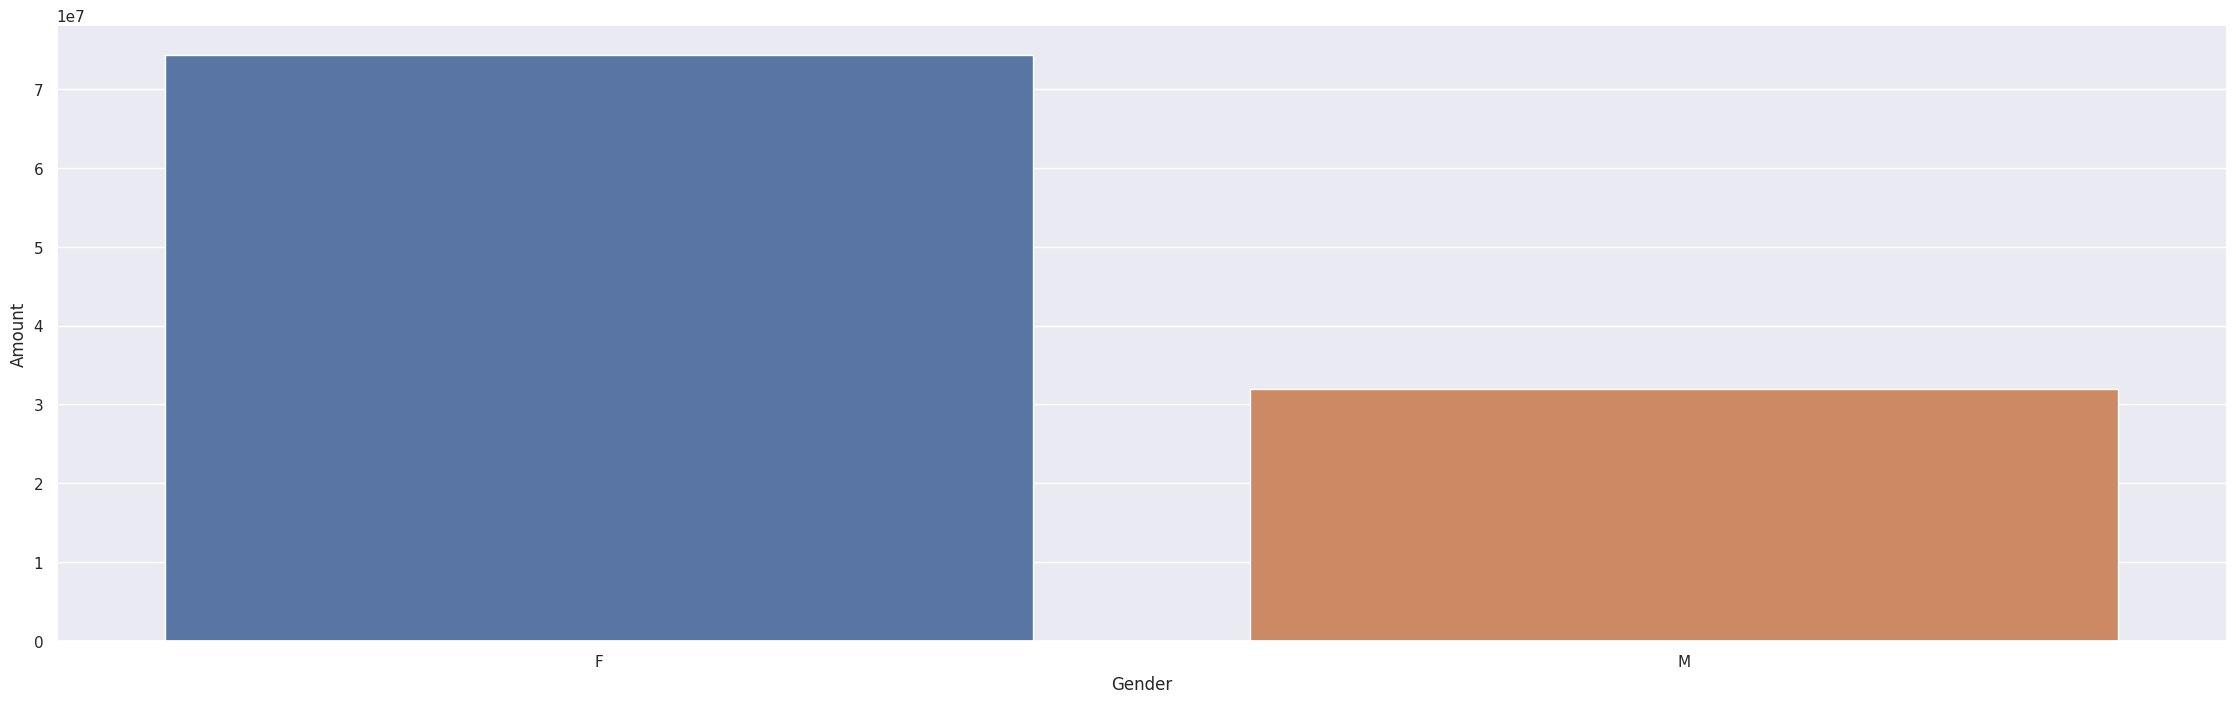

In [124]:
sales_gen = df.groupby(["Gender"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)
sns.barplot(x="Gender", y="Amount", data=sales_gen,hue="Gender")

From the above graph we can see that female buyers purchase more amount of products than men

**Age Group**
---

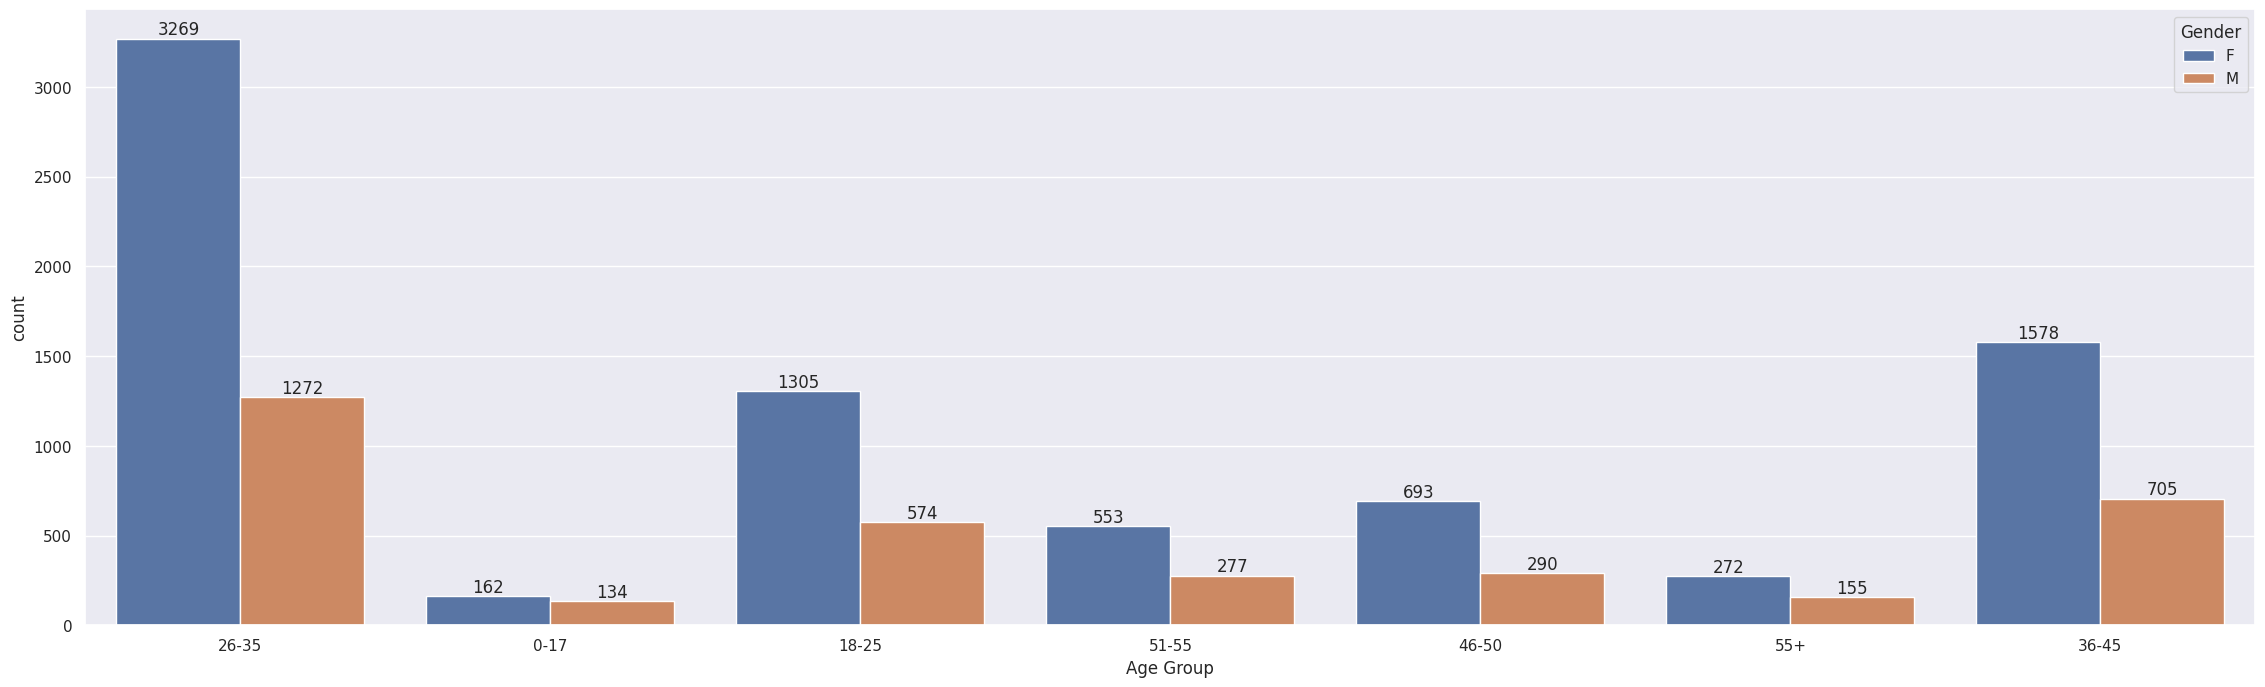

In [125]:
ax = sns.countplot(x="Age Group", data=df, hue="Gender")
for bars in ax.containers:
  ax.bar_label(bars)

From the above graph we can see that female buyers and male buyers between the age group of 26-35, they are very active in purchasing maximum number of products than anyother age group people.

<Axes: xlabel='Age Group', ylabel='Amount'>

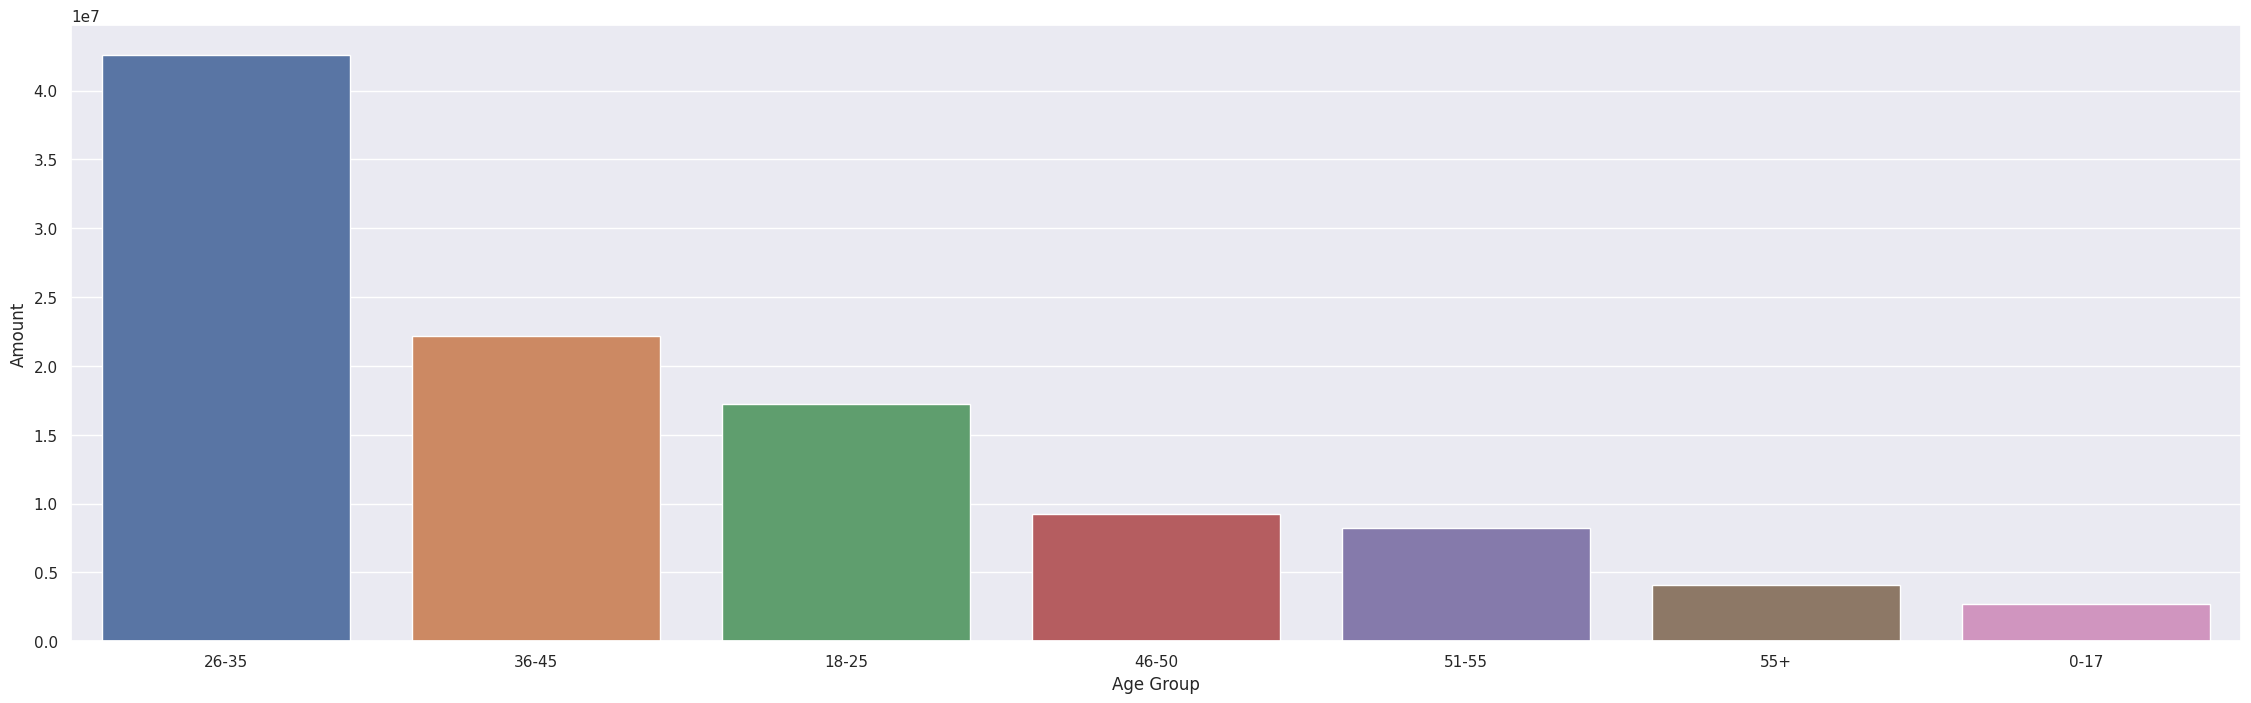

In [126]:
sales_age = df.groupby(["Age Group"],as_index = False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sns.barplot(x="Age Group", y="Amount", data=sales_age, hue="Age Group")

Overall people in the age group of 26-35 they are the contributing more in purchasing the goods tha  anyother age group people.

In [127]:
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934


**State**
---

In [128]:
df.groupby(["State"], as_index=False)["Orders"].sum().sort_values(by="Orders", ascending=False)

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


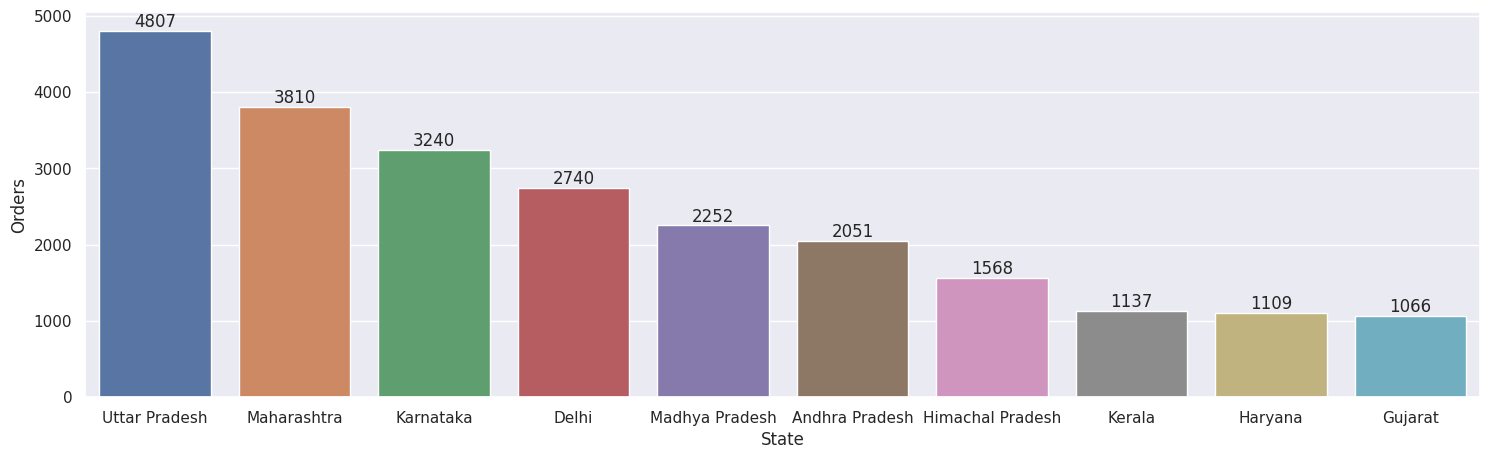

In [129]:
sales_state = df.groupby(["State"], as_index=False)["Orders"].sum().sort_values(by="Orders", ascending=False).head(10)
sns.set(rc={"figure.figsize":(18,5)})
ax = sns.barplot(x="State", y="Orders", data=sales_state, hue="State")
for bars in ax.containers:
  ax.bar_label(bars)

From the above graph we can see that maximum number of orders are being placed in Uttar Pradesh, Maharashtra and Karnataka.

In [130]:
df.groupby(["State"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False).head(10)


,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142
0,Andhra Pradesh,8037146
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3946082


<Axes: xlabel='State', ylabel='Amount'>

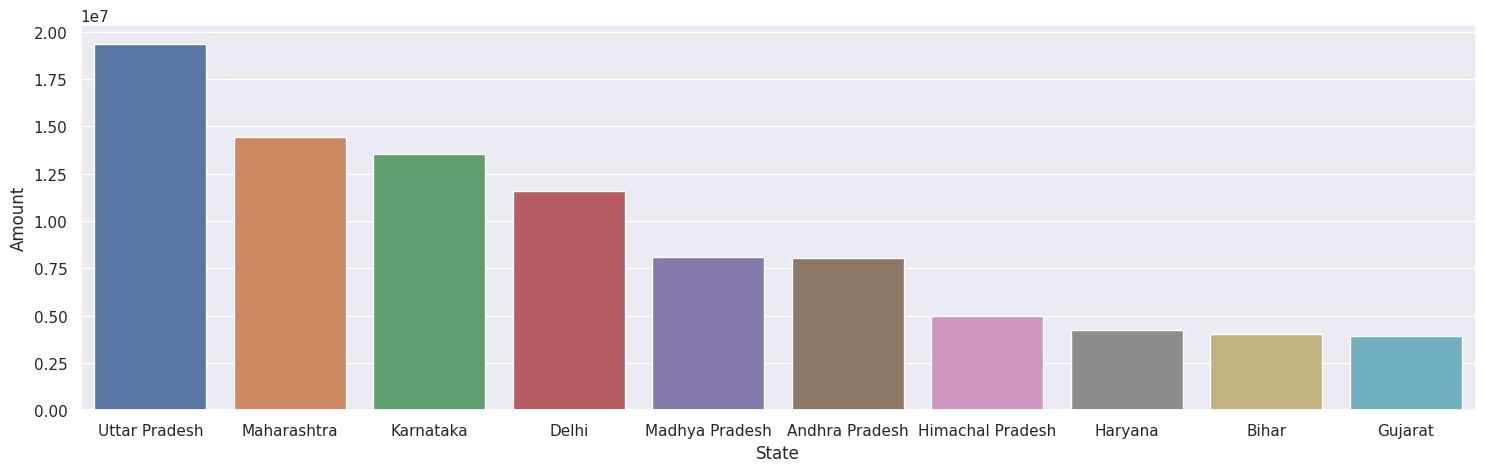

In [131]:
sales_state_amount = df.groupby(["State"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False).head(10)
sns.set(rc={"figure.figsize":(18,5)})
sns.barplot(x="State", y="Amount", data=sales_state_amount, hue="State")

From the above graph we can see that amount/sales for Uttar Pradesh is maximun

In [132]:
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934


**Martial Status**
---

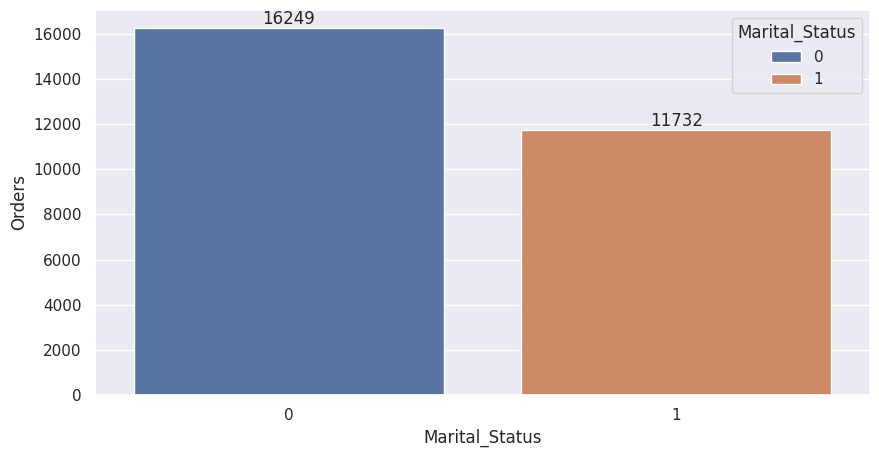

In [133]:
sales_Ms = df.groupby(["Marital_Status"], as_index=False)["Orders"].sum().sort_values(by="Orders", ascending=False)
sns.set(rc={"figure.figsize":(10,5)})
ax = sns.barplot(x="Marital_Status", y="Orders", data=sales_Ms, hue="Marital_Status")
for bars in ax.containers:
  ax.bar_label(bars)

Mostly unmarried people have purchased more or ordered maximum than married people.

In [134]:
df.groupby(["Zone"], as_index=False)["Orders"].sum().sort_values(by="Orders", ascending=False)

,Zone,Orders
0,Central,10623
3,Southern,6740
4,Western,4876
2,Northern,3727
1,Eastern,2015


From the above data, it is clear that the Central zone is the most active in terms of orders, indicating a high market presence and possibly better distribution networks. While the Southern zone also shows strong potential, the Western and Northern zones have moderate order volumes, suggesting opportunities for growth with targeted strategies. The Eastern zone, with the lowest order volume, presents a significant opportunity for market expansion through strategic initiatives and localized marketing efforts.

**Zones**
---

Text(0.5, 1.0, 'Orders by Zone')

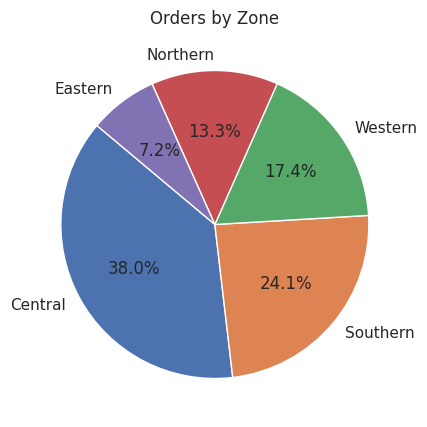

In [135]:
sales_zone = df.groupby(["Zone"], as_index=False)["Orders"].sum().sort_values(by="Orders", ascending=False)
sns.set(rc={"figure.figsize":(10,5)})
plt.pie(sales_zone["Orders"], labels=sales_zone["Zone"], autopct='%1.1f%%', startangle=140)
plt.title('Orders by Zone')



*  From the above data and and the percentage contribution, we can clearly see that people situated in Central zone has significantly higher orders compared to other zones in every state.
*  This suggests that the Central zone is a key area for sales, possibly due to higher population density, better distribution networks, or stronger marketing efforts.
*   Given the high volume of orders in the Central and Southern zones, it would be wise to allocate more resources to these areas. This could include better supply chain management, more warehouses, and targeted promotions.
*  For the Western and Northern zones, a strategic review could help identify specific local needs or barriers to increase sales. This might involve regional advertising campaigns, partnerships with local businesses, or improvements in delivery times.

**Product Ctegory**
---

In [136]:
product_count = df['Product_Category'].value_counts()
product_count

Product_Category
Clothing & Apparel       2655
Food                     2490
Electronics & Gadgets    2087
Footwear & Shoes         1059
Household items           520
Beauty                    422
Games & Toys              386
Sports Products           356
Furniture                 352
Pet Care                  212
Office                    113
Stationery                112
Books                     103
Auto                       97
Decor                      96
Veterinary                 81
Tupperware                 72
Hand & Power Tools         26
Name: count, dtype: int64

In [137]:
prod_orders = df.groupby(["Product_Category"], as_index=False)["Orders"].sum().sort_values(by="Orders", ascending=False)
prod_orders

,Product_Category,Orders
3,Clothing & Apparel,6634
6,Food,6110
5,Electronics & Gadgets,5226
7,Footwear & Shoes,2646
11,Household items,1331
1,Beauty,1086
9,Games & Toys,940
8,Furniture,889
14,Sports Products,870
13,Pet Care,536


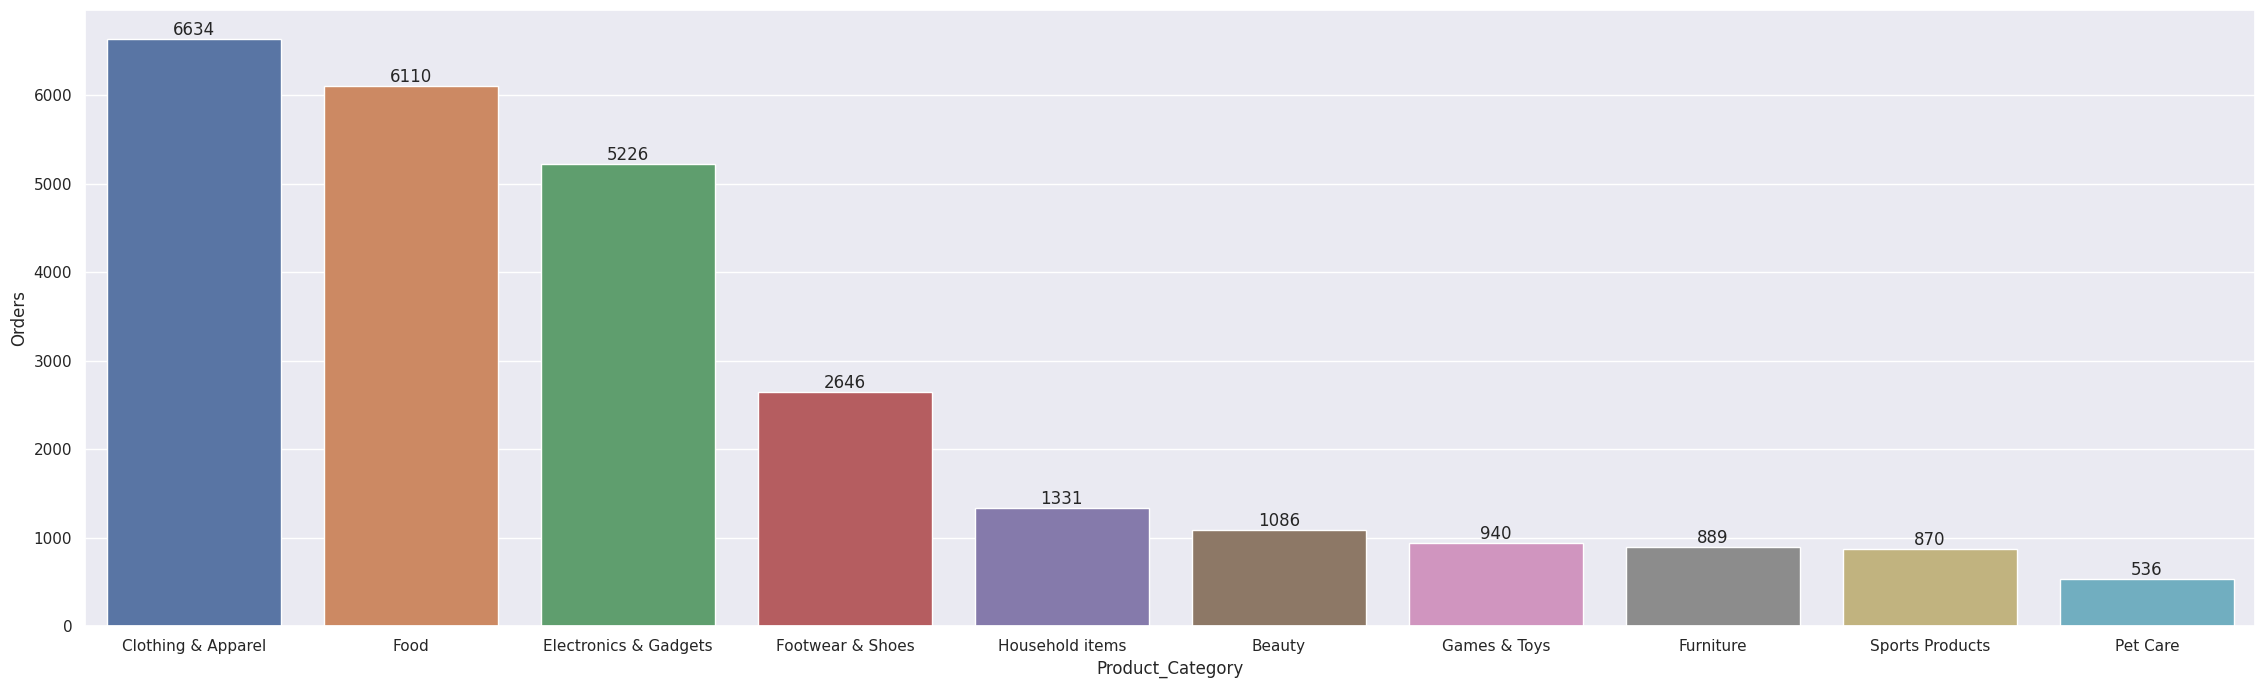

In [138]:
prod_orders = df.groupby(["Product_Category"], as_index=False)["Orders"].sum().sort_values(by="Orders", ascending=False).head(10)
sns.set(rc={"figure.figsize":(28,8)})
ax = sns.barplot(x="Product_Category", y="Orders", data=prod_orders, hue="Product_Category")
for bars in ax.containers:
  ax.bar_label(bars)

from the above graph we can see that most orders are placed for clothing & Apparel, food and Electronics & Gadgets.

In [139]:
prod_amt = df.groupby(["Product_Category"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)
prod_amt

,Product_Category,Amount
6,Food,33933883
3,Clothing & Apparel,16495019
5,Electronics & Gadgets,15643846
7,Footwear & Shoes,15575209
8,Furniture,5440051
9,Games & Toys,4331694
14,Sports Products,3635933
1,Beauty,1959484
0,Auto,1958609
15,Stationery,1676051


<Axes: xlabel='Product_Category', ylabel='Amount'>

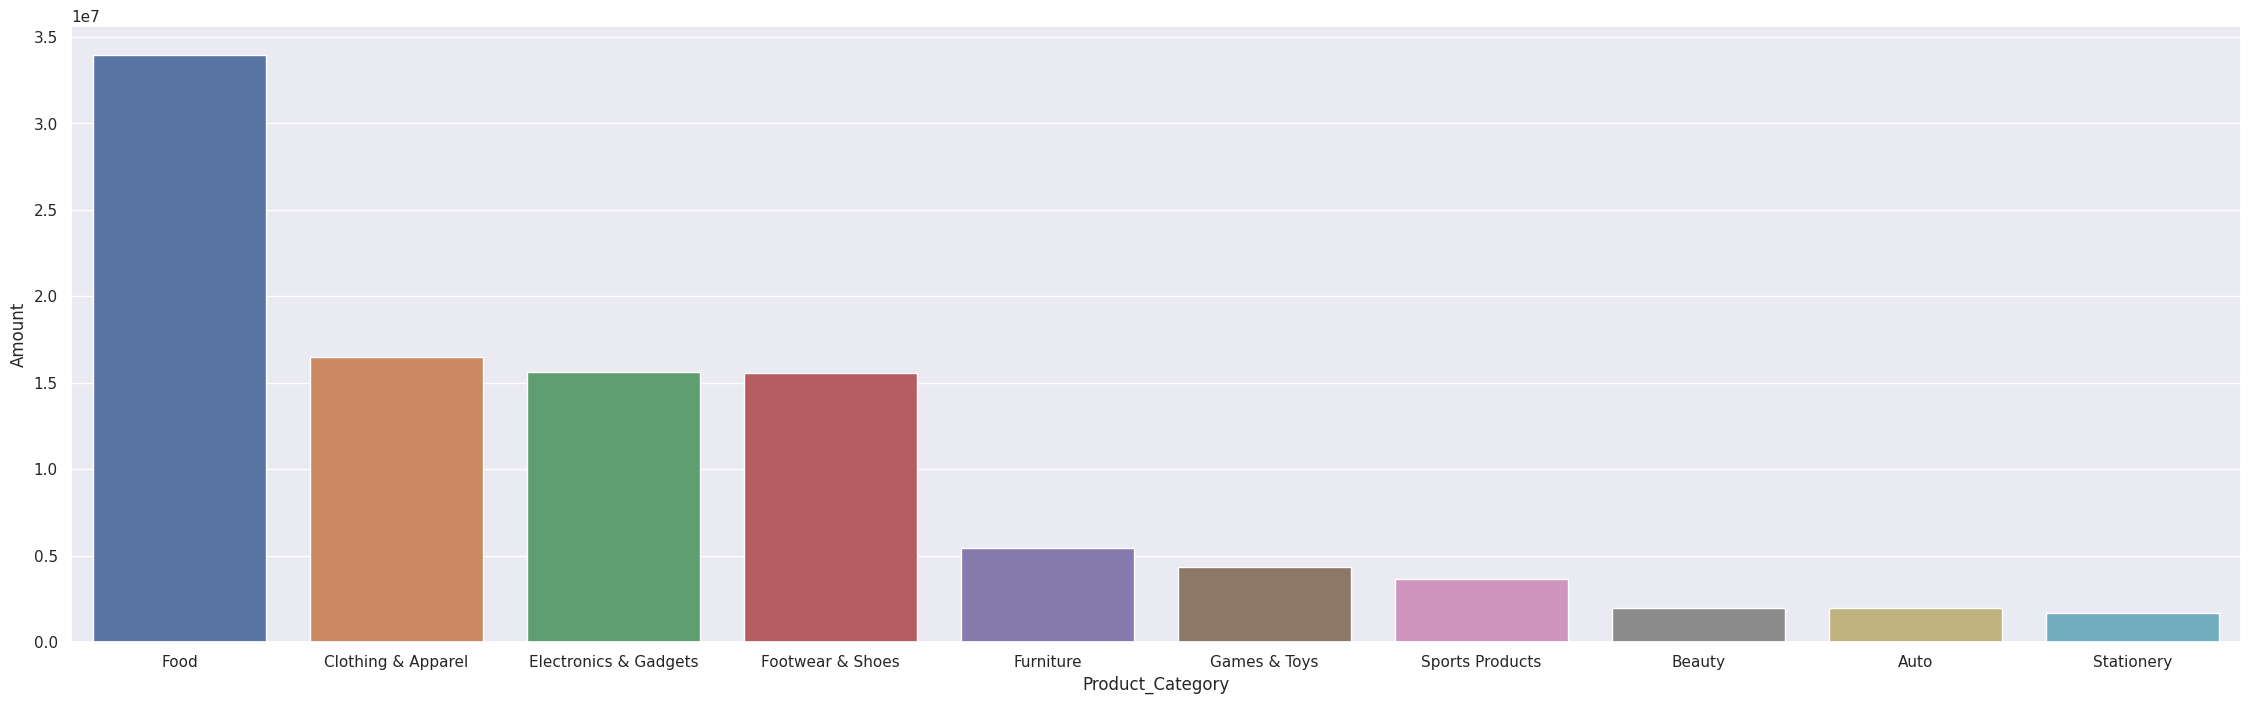

In [140]:
prod_amt = df.groupby(["Product_Category"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False).head(10)
sns.set(rc={"figure.figsize":(28,8)})
sns.barplot(x="Product_Category", y="Amount", data=prod_amt, hue="Product_Category")

Now we can clearly see that although most orders are being placed for clothing & Apparel but still food is contributing more in revenue generartion for the company.

In [141]:
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934


**Occupation**
---

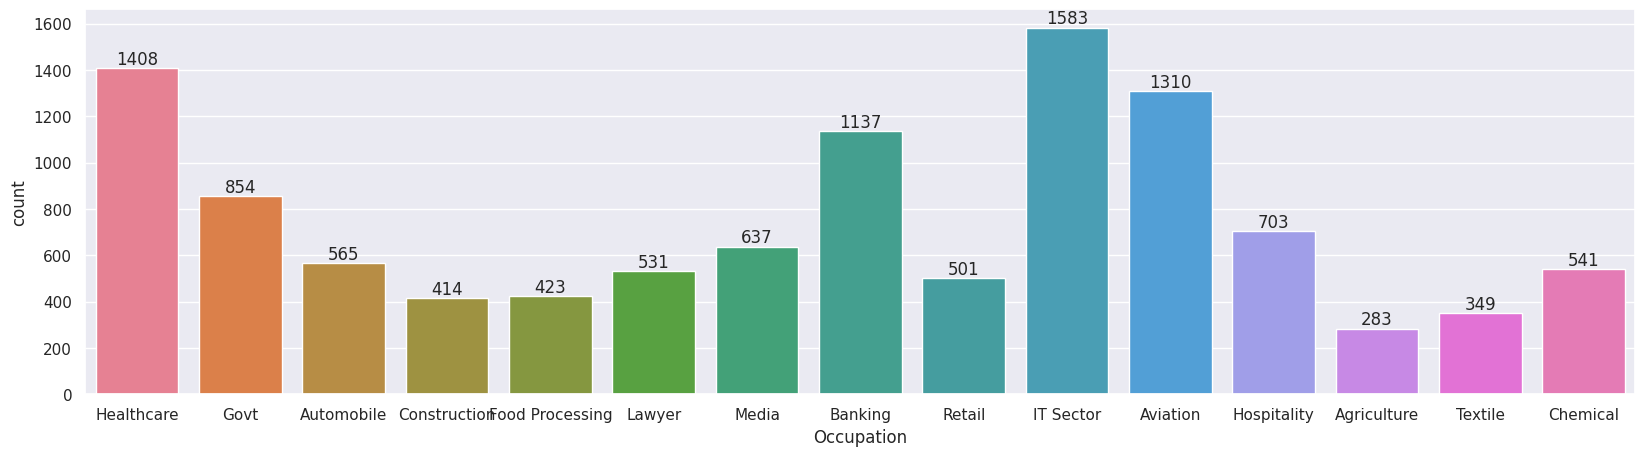

In [142]:
sns.set(rc={"figure.figsize":(20,5)})
ax = sns.countplot(x="Occupation",data=df,hue="Occupation")
for bars in ax.containers:
  ax.bar_label(bars)

There are more buyers from IT sector, healthcare and then Aviation

In [143]:
df.groupby(["Occupation"], as_index=False)["Orders"].sum().sort_values(by="Orders", ascending=False)

,Occupation,Orders
10,IT Sector,3997
8,Healthcare,3455
2,Aviation,3215
3,Banking,2817
7,Govt,2155
9,Hospitality,1739
12,Media,1596
1,Automobile,1371
11,Lawyer,1344
4,Chemical,1309


In [144]:
df.groupby(["Occupation"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)

,Occupation,Amount
10,IT Sector,14755079
8,Healthcare,13034586
2,Aviation,12602298
3,Banking,10770610
7,Govt,8517212
9,Hospitality,6376405
12,Media,6295832
1,Automobile,5368596
4,Chemical,5297436
11,Lawyer,4981665


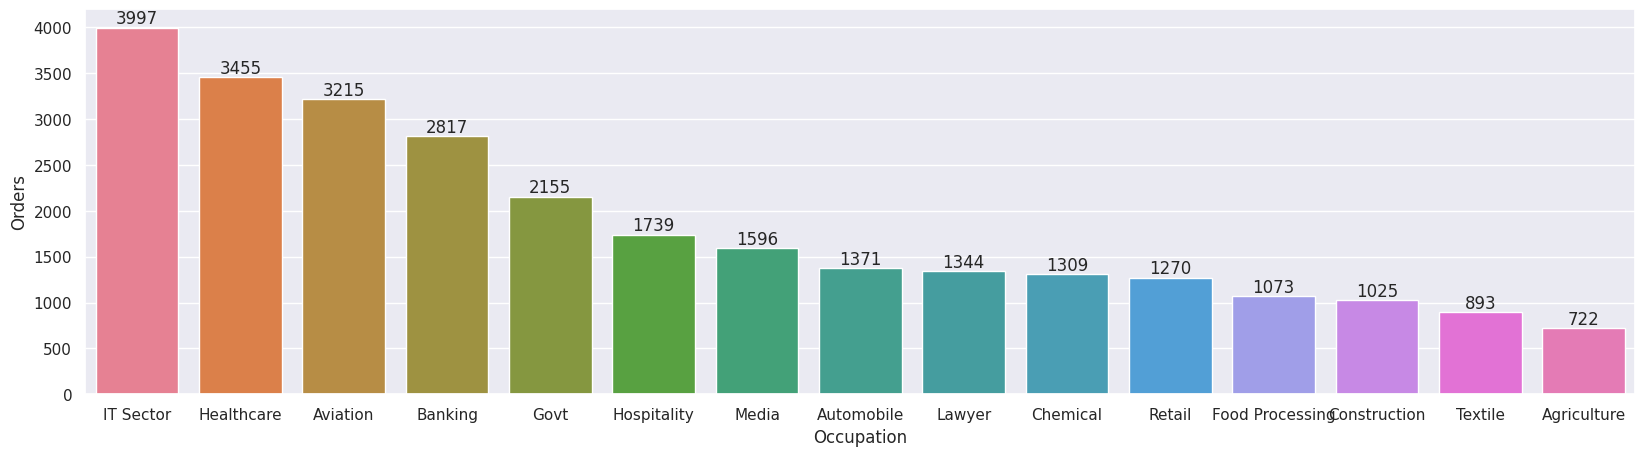

In [145]:
sales_occupation = df.groupby(["Occupation"], as_index=False)["Orders"].sum().sort_values(by="Orders", ascending=False)
ax = sns.barplot(x="Occupation", y="Orders", data=sales_occupation, hue="Occupation")
for bars in ax.containers:
  ax.bar_label(bars)

From the above graph and data we can see that large number of orders are placed from the IT sector, Healthcare and Aviation which automatically inreased the amount contributing in overall sales.